# Optimization exercise

## Goal: Train the 2nd order polynomial predictor using both gradient descent and stochastic gradient descent. Optimize the stepsizes and compare against scikit-learn implementation

1. Download data from https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing.

In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from copy import deepcopy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [9]:
data_path = ''
nb = pd.read_csv(data_path+'nba_games_2013_2015.csv', delimiter=';')
x = nb[['AST','REB','STL']]
y = nb['PTS']

2. Create a function psi(x), which transforms features AST (assists), REB (rebounds) and STL (steals) into 2nd order polynomial features (add each feature squared and each pair of features multiplied with every other)

In [10]:
def psi(x):
    res = deepcopy(x)
    res["1"] = 1
    res["AST2"] = x.AST * x.AST
    res["REB2"] = x.REB * x.REB
    res["STL2"] = x.STL * x.STL
    res["ASTSTL"] = x.AST * x.STL
    res["REBSTL"] = x.REB * x.STL
    res["ASTREB"] = x.AST * x.REB
    return res

3. Create a transformed data matrix X, where each x is mapped to psi(x).

In [11]:
X = psi(x)

In [12]:
X.head()

,AST,REB,STL,1,AST2,REB2,STL2,ASTSTL,REBSTL,ASTREB
0,41,43,14,1,1681,1849,196,574,602,1763
1,23,43,8,1,529,1849,64,184,344,989
2,20,39,7,1,400,1521,49,140,273,780
3,19,47,6,1,361,2209,36,114,282,893
4,21,43,4,1,441,1849,16,84,172,903


4. Create a function p2(x,w), which outputs the value of the polynomial at x for given parameters w.

In [13]:
def p2(x,w):
    df = deepcopy(x)
    df = psi(df)
    w = np.array(w)
    return (df * w).sum(axis = 1)

In [14]:
p2(x, [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01])

0       130.37
1        76.19
2        61.21
3        74.51
4        64.97
         ...  
7375     63.01
7376     79.59
7377     97.25
7378     78.85
7379     61.53
Length: 7380, dtype: float64

5. Create a function Loss(X,y,w), which computes the squared loss of predicting y from X by p2(x,w) using parameters w. Take variable PTS as y. We will predict scored points based on assists, rebounds and steals.

In [15]:
def loss(x,y,w):
    y_pred = p2(x, w)
    err = y - y_pred
    return np.mean(err**2)

In [16]:
w = [0.06, 0.05,0.03,0.01,0.02,0.02,0.04, 0.03,0.02,0.01]
loss(x,y,w)

891.9364108807587

6. Code up the gradient descent. It should input a point w and a stepsize.

In [17]:
def grad_descent(X, y, alpha, w, max_iters):
    # using deep copy, 
    # Assignment statements in Python do not copy objects, they create bindings between a target and an object.
    # when you want to have actual copy, it's better to use deepcopy
    df = deepcopy(X)
    #transforming df to 2nd degree polynom
    df = psi(df)
    
    #number of observation in X and y
    m = len(y)
    
    loss_func_history = []
#     w_history = []
#     w = np.array(w)
#     w_history.append(w)
    # computing initial loss
    loss_func_history.append(loss(X,y,w))
    
    # for each iteration
    for k in range(max_iters):
        # compute predictions with actual w
        predictions = p2(X, w)
        # number of coefients
        w_size = len(w)
        
        # computing gradient of each w separately (approximates partial derivation of function)
        for i in range(w_size):
            #taking 1 variable only from the dataframe
            temp = df.iloc[:, i]
            #errors multiply by the variable in place
            errors_x1 = (predictions - y) * temp
            # adjusting w[i]
            # gradient is basically sum of the erros divided by number of observation, np.mean could be used as well
            w[i] = w[i] - alpha * (1.0 / m) * errors_x1.sum()

        loss_func_history.append(loss(X,y,w))
#         w_history.append(w)
    return loss_func_history

7. Choose an arbitrary point and stepsize. Run gradient descent for 100 iterations and compute the Loss after each iteration. How does the loss behave? Does it converge to something?

In [18]:
loss_func_history = grad_descent(x,y,alpha=0.00001, w=np.ones(10), max_iters=100)

In [19]:
loss_func_history[-1]

inf

8. Can you find the stepsize, for which the loss is smallest after 100 iterations?

In [20]:
losses = []
steps = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
for alpha in steps:
    print(f"Step: {alpha}")
    losses.append(grad_descent(x,y,alpha=alpha, w=np.ones(10), max_iters=100))

Step: 1


<ipython-input-17-d17c50ca02b9>:34: RuntimeWarning: invalid value encountered in double_scalars
  w[i] = w[i] - alpha * (1.0 / m) * errors_x1.sum()


Step: 0.1
Step: 0.01
Step: 0.001
Step: 0.0001
Step: 1e-05
Step: 1e-06
Step: 1e-07
Step: 1e-08


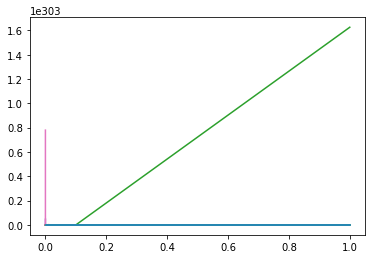

In [21]:
plt.plot(steps,losses)
plt.show()

In [22]:
losses

[[16380216.380352303,
  4.620636947694787e+20,
  1.3161025582420532e+34,
  3.748686616411069e+47,
  1.0677474397250375e+61,
  3.0412907551382917e+74,
  8.662581724074678e+87,
  2.4673840210605066e+101,
  7.027909347700868e+114,
  2.001776350090501e+128,
  5.701707801755505e+141,
  1.6240311688730775e+155,
  4.625767102023712e+168,
  1.3175683873735516e+182,
  3.7528617786370404e+195,
  1.0689366612407757e+209,
  3.0446780434305095e+222,
  8.672229818918869e+235,
  2.4701321111577206e+249,
  7.03573679892763e+262,
  2.004005861880141e+276,
  5.708058173895991e+289,
  1.625839960668216e+303,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  inf,
  10387.889295392953,
  10387.889295392953,
  10387.889295392953,
  10387.889295392953,
  10387.889295392953,
  10387.889295392953,
  10387.889295392953,
  10387.889295392953,
  10387.889295392953,
  10387.889295392953,
  10387.8892953